# <center>Time Series Analysis 2</center>
## <div align='right'>Made by Ihor Markevych</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as st
import statsmodels.tsa.seasonal as seas
import statsmodels.graphics.tsaplots as statplots
import statsmodels.regression.linear_model as lm
import numpy as np
import numpy.polynomial.polynomial as poly

## 1. Assume the 'robberies.csv' dataset from Brownlee Chapter 30:

### a. Perform a Dickey-Fuller test on the series. Is the series stationary?

In [2]:
robberies = pd.read_csv('./robberies.csv', index_col=0)
x = [i for i in range(len(robberies))]
y = np.array(robberies).reshape(1,-1)[0]

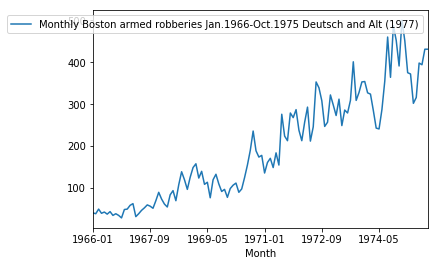

In [3]:
robberies.plot()
plt.show()

In [4]:
def adfullerWithPrint(data):
    t = st.adfuller(data)
    print(f'ADF statistic \t\t {t[0]}.')
    print(f'p-value \t\t {t[1]}.')
    print(f'Critical values \t\t {t[4]}.')
    
adfullerWithPrint(y)

ADF statistic 		 1.0011021402457776.
p-value 		 0.994277563805723.
Critical values 		 {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}.


p-value is much bigger than threshold of 0.05, so, the series are **non-stationary**.  
This can be also seen from the plot, as data has a changing mean.

### b. Detrend the series with a polynomial fit (up to order 3).

In [5]:
coefs = poly.polyfit(x, y, 1)
ffit = poly.polyval(x, coefs)
adfullerWithPrint(y - ffit)

ADF statistic 		 -1.6834041914281788.
p-value 		 0.4396827810671224.
Critical values 		 {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}.


In [6]:
coefs = poly.polyfit(x, y, 2)
ffit = poly.polyval(x, coefs)
adfullerWithPrint(y - ffit)

ADF statistic 		 -1.9736457382507375.
p-value 		 0.29824670782251683.
Critical values 		 {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}.


In [7]:
coefs = poly.polyfit(x, y, 3)
ffit = poly.polyval(x, coefs)
adfullerWithPrint(y - ffit)

ADF statistic 		 -2.0755574482958017.
p-value 		 0.25445596041347485.
Critical values 		 {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}.


Low order polynomials can not detrend these series.

### c. At what polynomial order does the detrended series become stationary?

In [8]:
coefs = poly.polyfit(x, y, 8)
ffit = poly.polyval(x, coefs)
adfullerWithPrint(y - ffit)

ADF statistic 		 -2.9516629375714603.
p-value 		 0.039661729537262796.
Critical values 		 {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}.


At order 8.

### d. Perform differencing on the original series to induce stationarity

In [9]:
def trendDifferencing(y, k):
    if k == 1:
        return [y[i] - y[i - 1] for i in range(1, len(y))]
    
    return differencing(differencing(y, k - 1), 1)

In [10]:
adfullerWithPrint(trendDifferencing(y, 1))

ADF statistic 		 -7.428564475067208.
p-value 		 6.450795412686704e-11.
Critical values 		 {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}.


### e. At what order of differencing does the series become stationary? 

Already at order 1.

## 2. Assume the 'champagne.csv' dataset from Brownlee Chapter 32:


In [11]:
champagne = pd.read_csv('./champagne.csv', index_col=0)
x = [i for i in range(len(champagne))]
y = np.array(champagne).reshape(1,-1)[0]

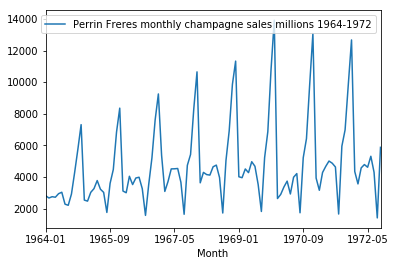

In [12]:
champagne.plot()
plt.show()

### a. Perform a Dickey-Fuller test on the series. Is the series stationary?

In [13]:
adfullerWithPrint(y)

ADF statistic 		 -1.8335930563276197.
p-value 		 0.3639157716602465.
Critical values 		 {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}.


Series are not stationary (p-value is > 0.05).  
Also, it can be seen from plot.

### b. Perform seasonal differencing to eliminate seasonality

In [14]:
def seasonDifferencing(y, s):
    return [y[i] - y[i - s] for i in range(s, len(y))]

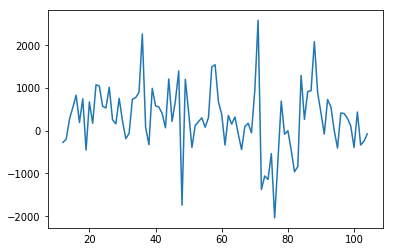

In [15]:
s = 12
plt.plot(x[s:], seasonDifferencing(y, s))
plt.show()

### c. Is the resulting series stationary?

In [16]:
adfullerWithPrint(seasonDifferencing(y, 12))

ADF statistic 		 -7.626619157213166.
p-value 		 2.0605796968136632e-11.
Critical values 		 {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}.


Yes, resulting series is stationary.

### d. Perform a seasonal decomposition on the original series and plot the results

In [17]:
decomposition = seas.seasonal_decompose(y, period=12)

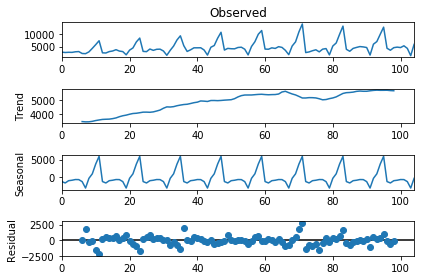

In [18]:
decomposition.plot()
plt.show()

### e. Plot a 1 year period (Jan-Dec) for only the seasonal component 

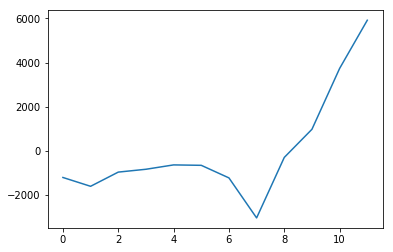

In [19]:
plt.plot(decomposition.seasonal[:12])
plt.show()

## 3 Assume the 'series.csv' dataset:## 

In [20]:
series = pd.read_csv('./series.csv', index_col=0)
x = [i for i in range(len(series))]
y = np.array(series).reshape(1,-1)[0]

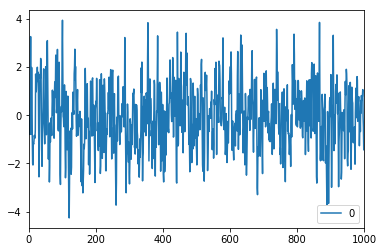

In [21]:
series.plot()
plt.show()

### a. Using ACF & PACF plots, estimate the ARMA(p,q) order

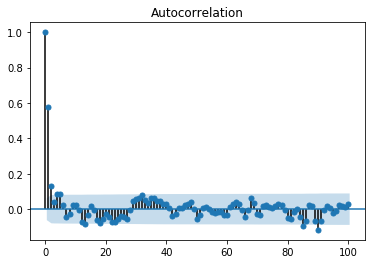

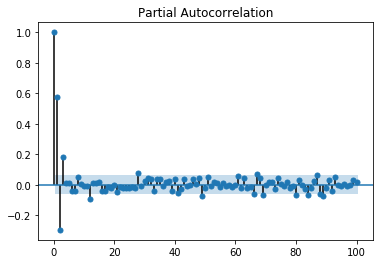

In [22]:
statplots.plot_acf(y, lags=100)
statplots.plot_pacf(y, lags=100)
plt.show()

* Sin decay of ACF.  
* PACF cuts after 3 spikes.
* Sin decay of PACF.
* ACF cuts after 2 spikes.
  
**ARMA(3, 2) model**.  

### b. Going with your answer for $p$, calculate the $a_1$ - $a_p$ coefficients using the Yule-Walker equations 

In [23]:
lm.yule_walker(y, order=3, method='mle')[0]

array([ 0.79829734, -0.430456  ,  0.18130054])

In [24]:
acf = st.acf(y, nlags=100, fft=False)
order = 3
yw = np.zeros((order,order))
for i in range(order):
    for j in range(i, order):
        yw[i,j] = acf[j - i]

In [25]:
np.linalg.solve(yw + yw.T - np.eye(order), 
                [acf[i] for i in range(1, order + 1)])

array([ 0.79829734, -0.430456  ,  0.18130054])

## 4 The sunspot cycle is estimated at 11 years. Based on the ACF of the "Monthly Sunspots" dataset, what is the sunspot cycle to the nearest month?

In [26]:
sunspots = pd.read_csv('./sunspots.csv', index_col=0)
x = [i for i in range(len(sunspots))]
y = np.array(sunspots).reshape(1,-1)[0]

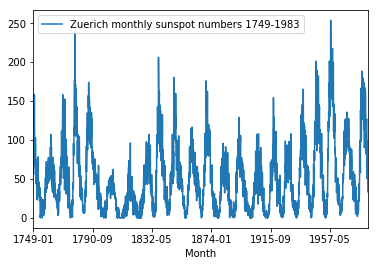

In [27]:
sunspots.plot()
plt.show()

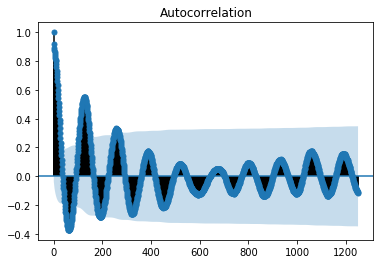

In [28]:
statplots.plot_acf(y, lags=1250)
plt.show()

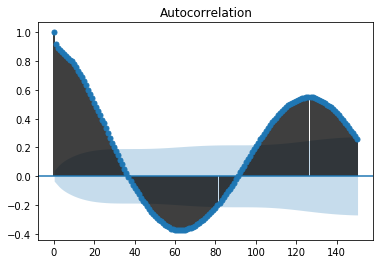

In [29]:
statplots.plot_acf(y, lags=150)
plt.show()

In [30]:
acf = st.acf(y, nlags=150, fft=False)
np.argmax(acf[60:]) + 60

125

From ACF plot we can assume that the sunspot cycle is 125 monthes. (Around 11 years).